1. Con la información que se encuentra en la pestaña "Base", realice un análisis descriptivo sobre el negocio en general y enumere las principales conclusiones sobre el periodo dado. Este punto realizarlo en un jupyter notebook (opcional)

2. Defina un plan de acción para identificar usuarios que con una alta probabilidad dejarian de usar una aplicación de retail ('Usuario Churn'). Realice una descripción de los pasos que llevaría a cabo, para completar esta tarea y que variables tendría en cuenta. ¿Que fuentes de datos usaria? ¿Que recursos externos? ¿Como modelaria el problema? ¿Que resultados esperaria lograr?

3. En Merqueo actualmente se tiene la necesidad de realizar una segmentación de usuarios. Realice la descripcion del proyecto que desarrollaría (desde la descripción y recolección de la necesidad, hasta el despliegue del modelo) para llegar a dicho fín. Defina los pasos a seguir, las variables y los recursos necesarios. 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.plotting.backend = "plotly"
pd.set_option('max_columns', None)

In [55]:
#df=pd.read_excel('Prueba Analista Data.xlsx',sheet_name='Base')
#df.to_pickle("./dummy.pkl")

In [56]:
#Saving the dataframe in a pickle file
#df.to_pickle("./dummy.pkl")

#if you want to remove the pkl file
#import os
#os.remove("./dummy.pkl")

In [57]:
#Reading pickle
df = pd.read_pickle("./dummy.pkl")
df.head()

,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
0,431199,Device,Android,2018-02-02 08:28:42,2018-02-01 00:07:58,2018-02-02 13:42:40,7:00 am - 12:00 pm,Efectivo,42552.0,0.0,2500,\N,Ferias,0,Bogotá,0,Sergio David Plazas Cruz,Daniel Alvarez Bonilla,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,10,10,0,0,0,0,0,0,0,0,0
1,431200,Device,Android,2018-02-02 06:16:52,2018-02-01 00:13:41,2018-02-02 07:13:01,7:00 am - 12:00 pm,Efectivo,32340.0,0.0,2500,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,johana s castro,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,7,7,0,0,0,0,0,0,0,0,0
2,431201,Device,Android,2018-02-02 07:00:50,2018-02-01 00:14:16,2018-02-02 10:07:37,7:00 am - 12:00 pm,Tarjeta de crédito,156610.0,0.0,0,\N,Ferias,0,Bogotá,0,Diego Mauricio Garzon Peña,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,47,47,0,0,0,0,0,0,0,0,0
3,431202,Web,\N,2018-02-02 06:16:53,2018-02-01 00:18:50,2018-02-02 09:29:54,7:00 am - 12:00 pm,Efectivo,201140.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,Alison acuña,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,80,80,0,0,0,0,0,0,0,0,0
4,431204,Web,\N,2018-02-02 06:21:29,2018-02-01 00:24:20,2018-02-02 08:49:35,7:00 am - 12:00 pm,Tarjeta de crédito,102290.0,10229.0,0,0,Ferias,0,Bogotá,0,luisa vargas,magnoliaT trujillo,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,26,26,0,0,0,0,0,0,0,1,0


In [58]:
df.shape

(70181, 33)

In [59]:
print('working with {} columns and {} rows of data'.format(len(df.columns),len(df.index)))
df.head()

working with 33 columns and 70181 rows of data


,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
0,431199,Device,Android,2018-02-02 08:28:42,2018-02-01 00:07:58,2018-02-02 13:42:40,7:00 am - 12:00 pm,Efectivo,42552.0,0.0,2500,\N,Ferias,0,Bogotá,0,Sergio David Plazas Cruz,Daniel Alvarez Bonilla,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,10,10,0,0,0,0,0,0,0,0,0
1,431200,Device,Android,2018-02-02 06:16:52,2018-02-01 00:13:41,2018-02-02 07:13:01,7:00 am - 12:00 pm,Efectivo,32340.0,0.0,2500,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,johana s castro,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,7,7,0,0,0,0,0,0,0,0,0
2,431201,Device,Android,2018-02-02 07:00:50,2018-02-01 00:14:16,2018-02-02 10:07:37,7:00 am - 12:00 pm,Tarjeta de crédito,156610.0,0.0,0,\N,Ferias,0,Bogotá,0,Diego Mauricio Garzon Peña,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,47,47,0,0,0,0,0,0,0,0,0
3,431202,Web,\N,2018-02-02 06:16:53,2018-02-01 00:18:50,2018-02-02 09:29:54,7:00 am - 12:00 pm,Efectivo,201140.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,Alison acuña,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,80,80,0,0,0,0,0,0,0,0,0
4,431204,Web,\N,2018-02-02 06:21:29,2018-02-01 00:24:20,2018-02-02 08:49:35,7:00 am - 12:00 pm,Tarjeta de crédito,102290.0,10229.0,0,0,Ferias,0,Bogotá,0,luisa vargas,magnoliaT trujillo,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,26,26,0,0,0,0,0,0,0,1,0


In [60]:
#Seeing the typyes and values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70181 entries, 0 to 70180
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   IdOrden                                     70181 non-null  int64         
 1   Source                                      70181 non-null  object        
 2   osSource                                    70181 non-null  object        
 3   FechaDespacho                               70181 non-null  object        
 4   FechaCreacion                               70181 non-null  datetime64[ns]
 5   FechaGestion                                70181 non-null  datetime64[ns]
 6   Horario                                     70181 non-null  object        
 7   MetodoDePago                                70181 non-null  object        
 8   PagoCliente                                 70181 non-null  float64       
 9   Descue

seems that we have we have no missing values, but we're going to check if any column contains nan

In [61]:
df.isna().any()

IdOrden                                       False
Source                                        False
osSource                                      False
FechaDespacho                                 False
FechaCreacion                                 False
FechaGestion                                  False
Horario                                       False
MetodoDePago                                  False
PagoCliente                                   False
Descuento                                     False
Domicilio                                     False
Calificacion                                  False
Bodega                                        False
Devolucion                                    False
Ciudad                                        False
RazonCancelacionGeneral                       False
nombre_picker_frio                            False
nombre_picker_seco                            False
Tienda                                        False
Tipo        

In fact, we have no nan values. every row of each feature has values

In [62]:
df.select_dtypes(include='datetime').head()

,FechaCreacion,FechaGestion,FechaEsperadaEntrega
0,2018-02-01 00:07:58,2018-02-02 13:42:40,2018-02-02 12:00:00
1,2018-02-01 00:13:41,2018-02-02 07:13:01,2018-02-02 12:00:00
2,2018-02-01 00:14:16,2018-02-02 10:07:37,2018-02-02 12:00:00
3,2018-02-01 00:18:50,2018-02-02 09:29:54,2018-02-02 12:00:00
4,2018-02-01 00:24:20,2018-02-02 08:49:35,2018-02-02 12:00:00


We must have 4 columns in datetime format instead of 3

In [63]:
#formating FechaDespacho and Horario
#pd.to_datetime(df.FechaDespacho,format='%Y-%m-%d %H:%M:%S')

The issue with the feature FechaDespacho is that it contains \N value

In [64]:
df[df.FechaDespacho=='\\N']

,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
12,431214,Device,Android,\N,2018-02-01 01:23:17,2018-02-05 15:43:39,12:00 pm - 5:00 pm,Efectivo,57390.0,0.0,0,\N,Ferias,0,Bogotá,Reprogramación-Merqueo,\N,\N,Merqueo Bogotá,Marketplace,2018-02-05 17:00:00,Cancelled,1,0,0,0,0,0,0,0,0,0,0
15,431218,Device,Android,\N,2018-02-01 02:14:39,2018-02-01 07:28:15,12:00 pm - 5:00 pm,Efectivo,37750.0,0.0,2500,\N,Ferias,0,Bogotá,Cancelado definitivamente-Cliente,\N,\N,Merqueo Bogotá,Merqueo,2018-02-02 17:00:00,Cancelled,6,0,0,0,0,0,0,0,0,0,0
36,431242,Device,Android,\N,2018-02-01 06:16:37,2018-02-01 18:27:41,7:00 am - 12:00 pm,Efectivo,65700.0,0.0,2500,\N,Ferias,0,Bogotá,Cancelado definitivamente-Cliente,\N,\N,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Cancelled,11,0,0,0,0,0,0,0,0,0,0
73,431280,Device,iOS,\N,2018-02-01 07:37:21,2018-02-01 20:02:02,7:00 am - 12:00 pm,Datáfono,107310.0,10731.0,0,\N,Ferias,0,Bogotá,Cancelado definitivamente-Cliente,\N,\N,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Cancelled,24,0,0,0,0,0,0,0,0,0,0
153,431366,Web,\N,\N,2018-02-01 09:04:56,2018-02-05 15:36:58,7:00 am - 12:00 pm,Efectivo,57390.0,0.0,0,1,Ferias,0,Bogotá,Reprogramación-Merqueo,\N,\N,Merqueo Bogotá,Marketplace,2018-02-05 12:00:00,Cancelled,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70129,501055,Device,Android,\N,2018-03-31 17:31:47,2018-03-31 22:58:14,12:00 pm - 5:00 pm,Tarjeta de crédito,256623.0,50000.0,0,\N,La Estrella,0,Medellín,Cancelado definitivamente-Cliente,\N,\N,Merqueo Medellín,Merqueo,2018-04-01 17:00:00,Cancelled,34,0,0,0,0,0,0,0,0,0,0
70143,501216,Device,Android,\N,2018-03-31 19:11:25,2018-04-01 00:06:34,7:00 am - 12:00 pm,Efectivo,171990.0,0.0,0,\N,La Estrella,0,Medellín,Cancelado definitivamente-Merqueo,\N,\N,Merqueo Medellín,Merqueo,2018-04-01 12:00:00,Cancelled,45,0,0,0,0,0,0,0,0,0,0
70158,501341,Device,iOS,\N,2018-03-31 20:24:23,2018-04-01 03:10:02,7:00 am - 12:00 pm,Tarjeta de crédito,81430.0,0.0,4500,\N,La Estrella,0,Medellín,Cancelado definitivamente-Cliente,Ximena Ricardo Oviedo,\N,Merqueo Medellín,Merqueo,2018-04-01 12:00:00,Cancelled,23,9,0,0,0,0,0,0,0,0,0
70163,501387,Device,Android,\N,2018-03-31 20:44:19,2018-03-31 23:51:02,7:00 am - 12:00 pm,Efectivo,39430.0,0.0,4500,\N,La Estrella,0,Medellín,Cancelado definitivamente-Merqueo,\N,\N,Merqueo Medellín,Merqueo,2018-04-01 12:00:00,Cancelled,16,0,0,0,0,0,0,0,0,0,0


Found that we have 2664 row tat not cotaints a FechaDespacho, some of reseason may be found looking at the RazonCancelacionGeneral or StatusOrden feature

instad of having \N values we are going to change it to NaT (NotaTime)

In [65]:
df.FechaDespacho=df.FechaDespacho.apply(lambda x: pd.NaT if x=='\\N' else x)

In [66]:
df.select_dtypes(include='datetime').head()

,FechaDespacho,FechaCreacion,FechaGestion,FechaEsperadaEntrega
0,2018-02-02 08:28:42,2018-02-01 00:07:58,2018-02-02 13:42:40,2018-02-02 12:00:00
1,2018-02-02 06:16:52,2018-02-01 00:13:41,2018-02-02 07:13:01,2018-02-02 12:00:00
2,2018-02-02 07:00:50,2018-02-01 00:14:16,2018-02-02 10:07:37,2018-02-02 12:00:00
3,2018-02-02 06:16:53,2018-02-01 00:18:50,2018-02-02 09:29:54,2018-02-02 12:00:00
4,2018-02-02 06:21:29,2018-02-01 00:24:20,2018-02-02 08:49:35,2018-02-02 12:00:00


Next I need to check if True FechaCreacion<FechaGestion<FechaDespacho<FechaEsperadaEntrega

In [67]:
df.FechaCreacion<df.FechaGestion#<df.FechaDespacho<df.FechaEsperadaEntrega

0        True
1        True
2        True
3        True
4        True
         ... 
70176    True
70177    True
70178    True
70179    True
70180    True
Length: 70181, dtype: bool

Because I don want to spend to much time looking if the condition matches and if not seeing through each one of those vales i will skip this step. But it is important to see in a intensive data cleaning analysis.

Now I like to see some brief statistical description of the df

In [68]:
#Done some descritive analysis of the numerical feature of the df
df.describe()

,IdOrden,PagoCliente,Descuento,Domicilio,Devolucion,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
count,70181.000000,7.018100e+04,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000,70181.000000
mean,466483.124792,8.225072e+04,2358.352087,2188.677847,0.082187,19.076830,16.488836,0.582807,0.006697,0.006255,0.005999,0.005286,0.001111,0.008991,0.013109,0.005814
std,20328.678624,9.087189e+04,8034.243455,2019.508881,0.274652,18.587636,17.582149,1.597893,0.081561,0.078843,0.077220,0.072515,0.033320,0.094395,0.113742,0.076025
min,431197.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448896.000000,3.356000e+04,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,466474.000000,5.291000e+04,0.000000,2500.000000,0.000000,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,484080.000000,1.057080e+05,0.000000,4500.000000,0.000000,26.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,513624.000000,6.679970e+06,206438.000000,5500.000000,1.000000,488.000000,268.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we ahve multiple numerical values that just contain 0-1, we need to change the way fo analysing those.

As a matter of fact, I print the features and the unique values for the ones that only contains less than 10 unique values and store those with more than 10 unique values in FWMT10UV.

In [69]:
#multiple features contains just values between 0-1 we like to se those columns
c=0
FWMT10UV=[]#features with more than 10 unique values
FWLT10UV=[]#features with less than 10 unique values
for feature in df.columns:
    if len(df[feature].unique())<=10:
        print('---------------------------')
        print('Feature: {}, data type: {}'.format(feature,df[feature].dtype))
        print(df[feature].unique())
        FWLT10UV.append(feature)
        c+=1
    else:
        FWMT10UV.append(feature)
print('---------------------------')
print(FWMT10UV)
print('---------------------------')
print('{} features less than ten unique values, on the other hand {} features with more than ten unique values'.format(c,len(FWMT10UV)))

---------------------------
Feature: Source, data type: object
['Device' 'Web' 'Reclamo']
---------------------------
Feature: osSource, data type: object
['Android' '\\N' 'iOS']
---------------------------
Feature: Horario, data type: object
['7:00 am - 12:00 pm' '12:00 pm - 5:00 pm' '5:00 pm - 10:00 pm']
---------------------------
Feature: MetodoDePago, data type: object
['Efectivo' 'Tarjeta de crédito' 'Datáfono' 'Efectivo y datáfono']
---------------------------
Feature: Domicilio, data type: int64
[2500    0 3500 1500 4500 5500 1900  900]
---------------------------
Feature: Calificacion, data type: object
['\\N' 0 1]
---------------------------
Feature: Bodega, data type: object
['Ferias' 'Montevideo' 'La Estrella']
---------------------------
Feature: Devolucion, data type: int64
[0 1]
---------------------------
Feature: Ciudad, data type: object
['Bogotá' 'Medellín']
---------------------------
Feature: RazonCancelacionGeneral, data type: object
[0 'Reprogramación-Merqueo' 'C

Now lets get some insights of the features with more than ten unique values.

In [70]:
#This is the DataFrame contains the features with more than ten unique values excluding the dates
df[FWMT10UV].select_dtypes(exclude='datetime')

,IdOrden,PagoCliente,Descuento,nombre_picker_frio,nombre_picker_seco,Unidades,UnidadesDisponibles,UnidadesNoDisponibles
0,431199,42552.0,0.0,Sergio David Plazas Cruz,Daniel Alvarez Bonilla,10,10,0
1,431200,32340.0,0.0,Jose Daniel Segura Poveda,johana s castro,7,7,0
2,431201,156610.0,0.0,Diego Mauricio Garzon Peña,anirley garzon,47,47,0
3,431202,201140.0,0.0,Jose Daniel Segura Poveda,Alison acuña,80,80,0
4,431204,102290.0,10229.0,luisa vargas,magnoliaT trujillo,26,26,0
...,...,...,...,...,...,...,...,...
70176,503463,25761.0,0.0,\N,Ximena Ricardo Oviedo,6,0,0
70177,504544,161708.0,0.0,Ximena Ricardo Oviedo,Cristian Ortiz,31,30,1
70178,504874,25790.0,0.0,\N,natalia andrea zabala jaramillo,3,3,0
70179,504914,57770.0,17331.0,\N,Cristian Ortiz,14,0,0


Notice that we only have 8 features

In [71]:
df[FWMT10UV].select_dtypes(exclude='datetime').columns

Index(['IdOrden', 'PagoCliente', 'Descuento', 'nombre_picker_frio',
       'nombre_picker_seco', 'Unidades', 'UnidadesDisponibles',
       'UnidadesNoDisponibles'],
      dtype='object')

In [72]:
df.IdOrden.value_counts()

454383    2
432109    1
451273    1
434881    1
441026    1
         ..
441725    1
439676    1
433529    1
431480    1
432147    1
Name: IdOrden, Length: 70180, dtype: int64

Because IdOrden must be unique, it is worth noting the value of that Id on the df

In [73]:
df[df['IdOrden'].isin([454383])]

,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
20777,454383,Reclamo,Android,2018-02-19 07:40:04,2018-02-18 22:50:57,2018-02-20 15:39:20,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,1,Bogotá,Cancelado definitivamente-Merqueo,\N,Javier Gamez,Merqueo Bogotá,Merqueo,2018-02-19 12:00:00,Cancelled,1,0,0,0,0,0,0,0,0,0,0
20778,454383,Reclamo,Android,2018-02-19 07:40:04,2018-02-18 22:50:57,2018-02-20 15:39:20,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,1,Bogotá,Cancelado definitivamente-Merqueo,\N,Javier Gamez,Merqueo Bogotá,Merqueo,2018-02-19 12:00:00,Cancelled,1,0,0,0,0,0,0,0,0,0,0


In [74]:
df.PagoCliente.value_counts()

0.0         2106
57390.0      132
218400.0      96
30980.0       84
56890.0       74
            ... 
36067.0        1
380584.0       1
150945.0       1
129636.0       1
170010.0       1
Name: PagoCliente, Length: 32757, dtype: int64

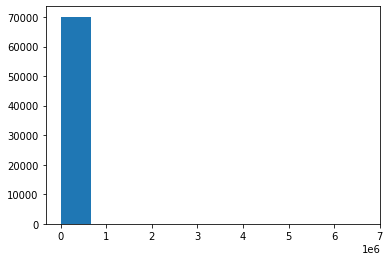

In [75]:
plt.hist(df.PagoCliente)
plt.show()

2106 spend 0 pesos!. but maybe this happenbecause of a cuppon(Descuento) or cancelled orders?

In [76]:
#Temp DataFrame of people where Pago=0 and Status=Delivered

temp=df[(df['PagoCliente']==0) & (df['StatusOrden']=='Delivered')]
print(temp.shape)
#filtering pago=0=descuento=0
print(temp[temp['PagoCliente']==temp['Descuento']].shape)
temp[temp['PagoCliente']==temp['Descuento']].head()

(1690, 33)
(1690, 33)


,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
110,431320,Reclamo,Android,2018-02-02 07:30:00,2018-02-01 08:23:00,2018-02-02 10:59:32,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,\N,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,4,4,0,0,0,0,0,0,0,0,0
186,431403,Reclamo,Android,2018-02-02 08:28:44,2018-02-01 09:35:48,2018-02-02 13:55:57,12:00 pm - 5:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,jose sebastian rativa,Merqueo Bogotá,Merqueo,2018-02-02 17:00:00,Delivered,2,2,0,0,0,0,0,0,0,0,0
203,431422,Reclamo,Android,2018-02-02 08:28:42,2018-02-01 09:51:15,2018-02-02 09:49:56,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,0,Bogotá,0,\N,magnoliaT trujillo,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,3,3,0,0,0,0,0,0,0,0,0
300,431529,Reclamo,iOS,2018-02-02 08:28:42,2018-02-01 11:32:48,2018-02-02 10:56:41,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,magnoliaT trujillo,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,3,2,1,0,0,0,0,0,0,0,0
322,431555,Reclamo,Android,2018-02-02 06:16:51,2018-02-01 11:50:07,2018-02-02 11:59:29,7:00 am - 12:00 pm,Efectivo,0.0,0.0,0,\N,Ferias,0,Bogotá,0,\N,Jesus Zamorano,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,19,19,0,0,0,0,0,0,0,0,0


Now we can see that 1690 wich StatusOrden = Delivered not pay for the order.

In a future analysis maybe we need to see if they have been not charged because of food quality.

Looking into de feature Descuento

In [77]:
df.Descuento.value_counts()

0.0        60501
10000.0     2881
40000.0      829
5000.0       718
30000.0      493
           ...  
46142.0        1
44080.0        1
7250.0         1
4742.0         1
22529.0        1
Name: Descuento, Length: 3040, dtype: int64

In [78]:
print('{}% of people did no get a Discount'.format(round(100*df.Descuento.value_counts()[0]/len(df),2)))

86.21% of people did no get a Discount


df.nombre_picker_frio.value_counts()

<Figure size 576x576 with 0 Axes>

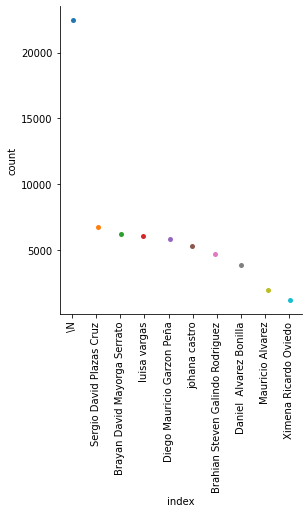

In [79]:
plt.figure(figsize=(8,8))
sns.catplot(x="index", y="nombre_picker_frio", data=df.nombre_picker_frio.value_counts().to_frame().reset_index().head(10))
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [80]:
df.nombre_picker_seco.value_counts().to_frame()

,nombre_picker_seco
Javier Gamez,3057
jose sebastian rativa,2779
\N,2693
Mateo Pardo,2641
yorman ferreira,2576
...,...
santiago boada,1
EXTRA karen martinez,1
EXTR paola mateus,1
alexander espejo,1


Doing a describe for the Unidades features, as we must have multiple of them

In [81]:
 df[['Unidades', 'UnidadesDisponibles','UnidadesNoDisponibles']].describe()

,Unidades,UnidadesDisponibles,UnidadesNoDisponibles
count,70181.000000,70181.000000,70181.000000
mean,19.076830,16.488836,0.582807
std,18.587636,17.582149,1.597893
min,1.000000,0.000000,0.000000
25%,7.000000,5.000000,0.000000
50%,12.000000,10.000000,0.000000
75%,26.000000,23.000000,0.000000
max,488.000000,268.000000,70.000000


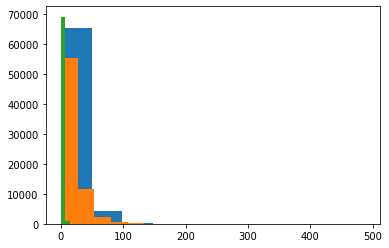

In [82]:
plt.hist(df['Unidades'])
plt.hist(df['UnidadesDisponibles'])
plt.hist(df['UnidadesNoDisponibles'])
plt.show()

Now lets get some insights of the features with less than ten unique values.

Seeing which city has more deliveries

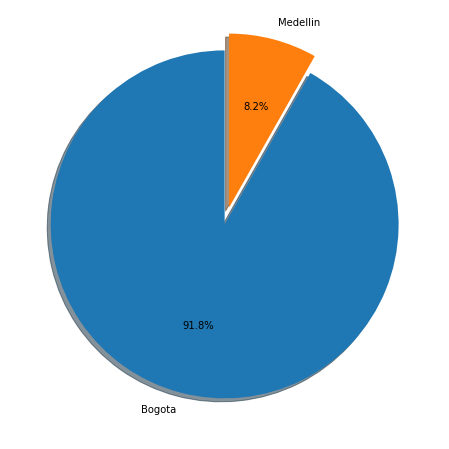

In [83]:
temp=df[df['StatusOrden']=='Delivered'].groupby('Ciudad')['Source'].count().reset_index(name='count')
labels='Bogota','Medellin'
sizes=temp['count']
explode = (0, 0.1)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [84]:
FWLT10UV

['Source',
 'osSource',
 'Horario',
 'MetodoDePago',
 'Domicilio',
 'Calificacion',
 'Bodega',
 'Devolucion',
 'Ciudad',
 'RazonCancelacionGeneral',
 'Tienda',
 'Tipo',
 'StatusOrden',
 'Repartidor',
 'Otro',
 'TiempoEntrega',
 'El producto estaba en mal estado',
 'El producto estaba vencido',
 'Me molesta no haber recibido este producto',
 'No recibi el producto y me lo cobraron',
 'Recibí el producto equivocado']

* We can see by Source or osSource which has more deliverates or more income
* horario with more deliveries
* MetodoDePago more fequent
* Domicilio persistent tip
* Calificacion 3 unique values, people often give bad reviews based on the experience, take a look of those with reviews.
*  Devolucion insights of why the people return.
* CIUDAD, we can play around with other features (Check if Ciudad == Tienda)
* RazonCancelaciónGeneral, look at Devolicion also wih this feature
* Tipo contains Merqueo and Marketplace, look at which sells more?
* StatusOrden  IMPORTANT indicates if  Cancelled or Delivered
* Repartidor, tiempo en entrega and Otro contains 0 or 1, what those features tell us?
* Check quality of producto (5 features).
* Wich Bodega "sells" more

In [85]:
#adding Web where \N is
df.osSource=df.osSource.apply(lambda x: 'Web' if x=='\\N' else x)

Looking which osSource have more orders overall

In [86]:
print(df.groupby(['osSource','StatusOrden'])['IdOrden'].count())
df.groupby(['osSource','StatusOrden'])['IdOrden'].count().unstack().plot(kind='bar')

osSource  StatusOrden
Android   Cancelled       5412
          Delivered      42743
Web       Cancelled        985
          Delivered       7494
iOS       Cancelled       1321
          Delivered      12226
Name: IdOrden, dtype: int64


Looking which osSource have more income overall from delivered orders

In [87]:
df[df['StatusOrden'].isin(['Delivered'])].groupby(['osSource'])['PagoCliente'].sum().plot(kind='bar')

Horario with more Deliveries overall

In [88]:
df.groupby('Horario')['IdOrden'].count().plot()

Checking wich MetodoDePago move more cash overall

In [89]:
df.groupby('MetodoDePago')['PagoCliente'].sum().sort_values(ascending=False).plot(kind='bar')

Checking Calificacion feature, and the inplications of have a score  of 0 or 1

In [90]:
df.Calificacion.value_counts()

\N    44053
1     22682
0      3446
Name: Calificacion, dtype: int64

In [91]:
#df[df.Calificacion==1]
df.groupby('Calificacion')['El producto estaba en mal estado','El producto estaba vencido',	'Me molesta no haber recibido este producto','No recibi el producto y me lo cobraron','Recibí el producto equivocado'].sum()

,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
Calificacion,,,,,
0,370,78,630,915,405
1,0,0,1,1,1
\N,1,0,0,4,2


Seems that Calification=0 is bad.

We also could see if StatusOrden was Cancelled and Devolucion

In [92]:
df[df.Devolucion.isin([1])]#.mode(dropna=False)

,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado
18,431221,Device,Android,2018-02-02 06:19:19,2018-02-01 02:39:30,2018-02-02 12:13:12,12:00 pm - 5:00 pm,Efectivo,105702.0,0.0,0,\N,Ferias,1,Bogotá,Reprogramación-Cliente,\N,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 17:00:00,Cancelled,19,0,0,0,0,0,0,0,0,0,0
20,431223,Device,Android,2018-02-02 07:00:51,2018-02-01 03:51:48,2018-02-02 09:00:39,7:00 am - 12:00 pm,Efectivo,62540.0,0.0,2500,\N,Ferias,1,Bogotá,Cancelado definitivamente-Cliente,Brayan David Mayorga Serrato,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Cancelled,7,0,0,0,0,0,0,0,0,0,0
27,431231,Device,iOS,2018-02-02 06:33:23,2018-02-01 05:36:01,2018-02-02 14:16:06,12:00 pm - 5:00 pm,Efectivo,50430.0,0.0,0,\N,Ferias,1,Bogotá,0,Daniel Alvarez Bonilla,HEIDI CUESTA,Merqueo Bogotá,Merqueo,2018-02-02 17:00:00,Delivered,12,10,0,0,0,0,0,0,0,0,0
30,431236,Device,Android,2018-02-05 06:16:44,2018-02-01 06:10:32,2018-02-05 15:01:18,12:00 pm - 5:00 pm,Efectivo,50870.0,0.0,2500,\N,Ferias,1,Bogotá,Reprogramación-Cliente,Diego Mauricio Garzon Peña,sandra pachon prieto pachon prieto,Merqueo Bogotá,Merqueo,2018-02-05 17:00:00,Cancelled,12,0,0,0,0,0,0,0,0,0,0
60,431267,Device,iOS,2018-02-02 08:24:06,2018-02-01 07:17:59,2018-02-02 10:32:57,7:00 am - 12:00 pm,Efectivo,60002.0,0.0,2500,0,Ferias,1,Bogotá,0,Sergio David Plazas Cruz,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,23,18,4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70161,501368,Device,iOS,2018-04-01 06:35:35,2018-03-31 20:37:11,2018-04-01 09:02:11,7:00 am - 12:00 pm,Efectivo,54450.0,0.0,4500,\N,La Estrella,1,Medellín,Reprogramación-Cliente,Ximena Ricardo Oviedo,Nelson Herrera,Merqueo Medellín,Merqueo,2018-04-01 12:00:00,Cancelled,6,0,0,0,0,0,0,0,0,0,0
70172,501562,Device,iOS,2018-04-02 06:46:03,2018-03-31 23:05:07,2018-04-02 13:38:49,12:00 pm - 5:00 pm,Datáfono,93700.0,0.0,4500,\N,La Estrella,1,Medellín,0,Ximena Ricardo Oviedo,natalia andrea zabala jaramillo,Merqueo Medellín,Merqueo,2018-04-02 17:00:00,Delivered,31,25,4,0,0,0,0,0,0,0,0
70175,502106,Device,iOS,2018-04-02 06:35:11,2018-03-31 17:18:03,2018-04-02 11:29:07,7:00 am - 12:00 pm,Datáfono,131577.0,39473.0,0,\N,La Estrella,1,Medellín,Reprogramación-Cliente,Ximena Ricardo Oviedo,yulieth estrada montoya,Merqueo Medellín,Merqueo,2018-04-02 12:00:00,Cancelled,36,0,1,0,0,0,0,0,0,0,0
70176,503463,Device,Android,2018-04-02 13:14:14,2018-03-31 15:37:37,2018-04-02 18:05:05,5:00 pm - 10:00 pm,Efectivo,25761.0,0.0,4500,\N,La Estrella,1,Medellín,Cancelado definitivamente-Cliente,\N,Ximena Ricardo Oviedo,Merqueo Medellín,Merqueo,2018-04-02 22:00:00,Cancelled,6,0,0,0,0,0,0,0,0,0,0


We Could see that more od the Devolucion=1 is because Unidades disponibles<Unidades

Checking main razon of RazonCancelacionGeneral overall

In [93]:
df.RazonCancelacionGeneral.value_counts().drop(0).plot(kind='bar')

In [94]:
df.groupby('Tipo')['IdOrden'].count().plot(kind='bar')

Bast majority of the oderder types is place on Merqueo.

Some insight is to look a the item that is most sell by marketplace to incomportorate it in Merqueo.

'Repartidor','Otro','TiempoEntrega' features?

In [95]:
df.groupby(['Repartidor','Otro','TiempoEntrega'])['IdOrden'].count()

Repartidor  Otro  TiempoEntrega
0           0     0                68960
                  1                  331
            1     0                  409
                  1                   11
1           0     0                  379
                  1                   72
            1     0                   12
                  1                    7
Name: IdOrden, dtype: int64

Need to have a better undertating of those features 

Last I want to check which Bodega is more deamanded

In [96]:
df.Bodega.value_counts()

Ferias         40321
Montevideo     23997
La Estrella     5863
Name: Bodega, dtype: int64

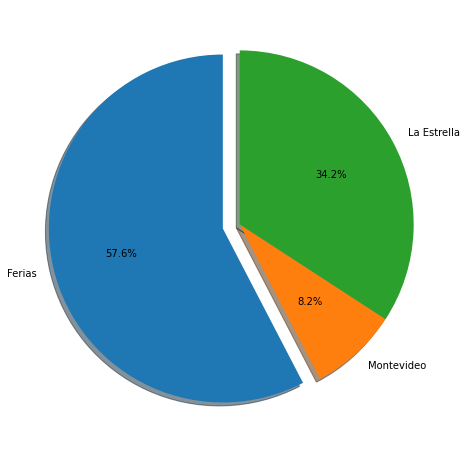

In [97]:
temp=df[df['StatusOrden']=='Delivered'].groupby('Bodega')['Source'].count().reset_index(name='count')
labels=df.Bodega.unique()
sizes=temp['count']
explode = (0.1, 0,0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

Ferias have the most demand

best picker by month 'nombre_picker_frio', 'nombre_picker_seco' must be the one with more deliveries and income?¿ and whith a Calificacion=1

-------------------------

### Agreggating features as month, day, year and hours

Im goin to work with FechaGestion and split if delivered or cancelled, in order to have a Forecasting of the income to merqueo nad marketplace despite location and other factors.

In [98]:
#Create a new column with the Year, Month,day and hour
df['Año']=df.FechaGestion.dt.year
df['Mes']=df.FechaGestion.dt.month
df['Dia']=df.FechaGestion.dt.day
df['Hora']=df.FechaGestion.dt.hour
df['Date']=df.FechaGestion.dt.date

In [99]:
df.head()

,IdOrden,Source,osSource,FechaDespacho,FechaCreacion,FechaGestion,Horario,MetodoDePago,PagoCliente,Descuento,Domicilio,Calificacion,Bodega,Devolucion,Ciudad,RazonCancelacionGeneral,nombre_picker_frio,nombre_picker_seco,Tienda,Tipo,FechaEsperadaEntrega,StatusOrden,Unidades,UnidadesDisponibles,UnidadesNoDisponibles,Repartidor,Otro,TiempoEntrega,El producto estaba en mal estado,El producto estaba vencido,Me molesta no haber recibido este producto,No recibi el producto y me lo cobraron,Recibí el producto equivocado,Año,Mes,Dia,Hora,Date
0,431199,Device,Android,2018-02-02 08:28:42,2018-02-01 00:07:58,2018-02-02 13:42:40,7:00 am - 12:00 pm,Efectivo,42552.0,0.0,2500,\N,Ferias,0,Bogotá,0,Sergio David Plazas Cruz,Daniel Alvarez Bonilla,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,10,10,0,0,0,0,0,0,0,0,0,2018,2,2,13,2018-02-02
1,431200,Device,Android,2018-02-02 06:16:52,2018-02-01 00:13:41,2018-02-02 07:13:01,7:00 am - 12:00 pm,Efectivo,32340.0,0.0,2500,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,johana s castro,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,7,7,0,0,0,0,0,0,0,0,0,2018,2,2,7,2018-02-02
2,431201,Device,Android,2018-02-02 07:00:50,2018-02-01 00:14:16,2018-02-02 10:07:37,7:00 am - 12:00 pm,Tarjeta de crédito,156610.0,0.0,0,\N,Ferias,0,Bogotá,0,Diego Mauricio Garzon Peña,anirley garzon,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,47,47,0,0,0,0,0,0,0,0,0,2018,2,2,10,2018-02-02
3,431202,Web,Web,2018-02-02 06:16:53,2018-02-01 00:18:50,2018-02-02 09:29:54,7:00 am - 12:00 pm,Efectivo,201140.0,0.0,0,\N,Ferias,0,Bogotá,0,Jose Daniel Segura Poveda,Alison acuña,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,80,80,0,0,0,0,0,0,0,0,0,2018,2,2,9,2018-02-02
4,431204,Web,Web,2018-02-02 06:21:29,2018-02-01 00:24:20,2018-02-02 08:49:35,7:00 am - 12:00 pm,Tarjeta de crédito,102290.0,10229.0,0,0,Ferias,0,Bogotá,0,luisa vargas,magnoliaT trujillo,Merqueo Bogotá,Merqueo,2018-02-02 12:00:00,Delivered,26,26,0,0,0,0,0,0,0,1,0,2018,2,2,8,2018-02-02


In [100]:
df.groupby(['Date','StatusOrden'])['PagoCliente'].sum().unstack().plot()

WE can do a time series prediction for the next days using DNN

In [101]:
df.groupby(['Date','StatusOrden'])['PagoCliente'].sum().unstack()

StatusOrden,Cancelled,Delivered
Date,,
2018-02-01,1477085.0,NaN
2018-02-02,10173390.0,86081349.0
2018-02-03,11467778.0,89070117.0
2018-02-04,11213528.0,119516450.0
2018-02-05,15492686.0,110160332.0
...,...,...
2018-04-12,29094.0,NaN
2018-04-13,312824.0,NaN
2018-04-14,43750.0,NaN


In [102]:
# Because DNN are sensitive with missing values we are ging to interpolate NaN
df.groupby(['Date','StatusOrden'])['PagoCliente'].sum().unstack().interpolate(method ='linear', limit_direction ='forward')

StatusOrden,Cancelled,Delivered
Date,,
2018-02-01,1477085.0,NaN
2018-02-02,10173390.0,86081349.0
2018-02-03,11467778.0,89070117.0
2018-02-04,11213528.0,119516450.0
2018-02-05,15492686.0,110160332.0
...,...,...
2018-04-12,29094.0,297494.0
2018-04-13,312824.0,308346.0
2018-04-14,43750.0,319198.0


In [103]:
#ploting
df.groupby(['Date','StatusOrden'])['PagoCliente'].sum().unstack().interpolate(method ='linear', limit_direction ='forward').plot()

In [104]:
dlv=df.groupby(['Date','StatusOrden'])['PagoCliente'].sum().unstack().interpolate(method ='linear', limit_direction ='forward')['Delivered'].reset_index()
dlv.head()

,Date,Delivered
0,2018-02-01,NaN
1,2018-02-02,86081349.0
2,2018-02-03,89070117.0
3,2018-02-04,119516450.0
4,2018-02-05,110160332.0


Remove before 1 Apr 2018 and 1 Feb 2018

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X=dlv['Date']
y=dlv['Delivered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)#,random_state=42)

In [107]:
X_train

0     2018-02-01
1     2018-02-02
2     2018-02-03
3     2018-02-04
4     2018-02-05
5     2018-02-06
6     2018-02-07
7     2018-02-08
8     2018-02-09
9     2018-02-10
10    2018-02-11
11    2018-02-12
12    2018-02-13
13    2018-02-14
14    2018-02-15
15    2018-02-16
16    2018-02-17
17    2018-02-18
18    2018-02-19
19    2018-02-20
20    2018-02-21
21    2018-02-22
22    2018-02-23
23    2018-02-24
24    2018-02-25
25    2018-02-26
26    2018-02-27
27    2018-02-28
28    2018-03-01
29    2018-03-02
30    2018-03-03
31    2018-03-04
32    2018-03-05
33    2018-03-06
34    2018-03-07
35    2018-03-08
36    2018-03-09
37    2018-03-10
38    2018-03-11
39    2018-03-12
40    2018-03-13
41    2018-03-14
42    2018-03-15
43    2018-03-16
44    2018-03-17
45    2018-03-18
46    2018-03-19
47    2018-03-20
48    2018-03-21
49    2018-03-22
Name: Date, dtype: object

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creating a simple model With just Dense layers
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Fitting the model

In [ ]:
model=model_dnn(look_back)

history=model.fit(X_train,y_train,epochs=100, batch_size=30, verbose=1, validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Model evaluation

In [ ]:
 def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)